In [733]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


Initial Analysis

In [ ]:

df=pd.read_csv("Dataset.csv")
print("Shape of dataset:", df.shape)
df.head()
# 3. Data Overview
df.info()
df.describe(include='all')


Shape of dataset: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  i

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
count,649,649,649,599,649,649.000000,576.000000,649,649,649,...,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000,649
unique,2,2,2,2,2,NaN,NaN,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,U,GT3,T,NaN,NaN,other,other,course,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,423,383,452,424,569,NaN,NaN,258,367,285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410
mean,NaN,NaN,NaN,NaN,NaN,2.514638,2.303819,NaN,NaN,NaN,...,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295,NaN
std,NaN,NaN,NaN,NaN,NaN,1.134552,1.111076,NaN,NaN,NaN,...,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,...,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,...,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000,NaN


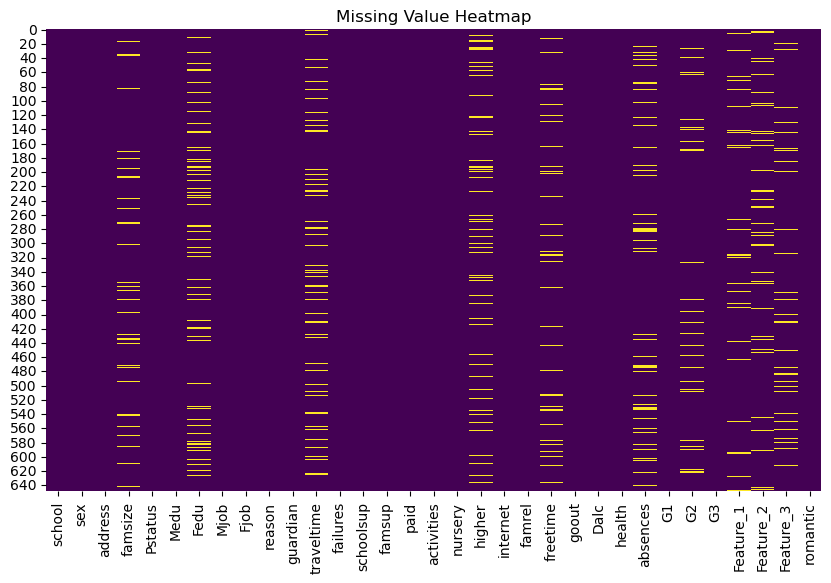

In [893]:
# 4. Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


Feature 1, 2, 3 analysis

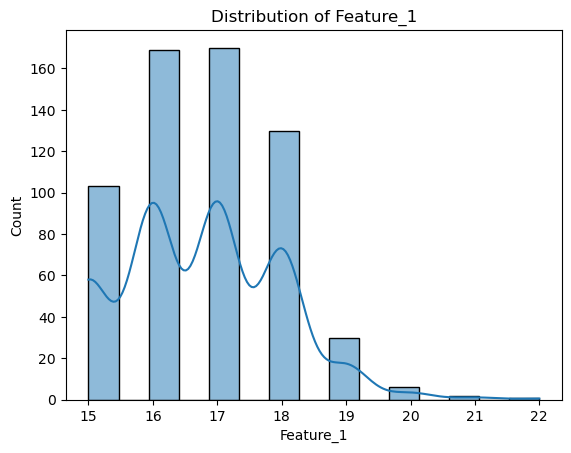

In [894]:
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')
plt.show()


The range of the Feature_1 could suggest it is age. Need more correlation details.

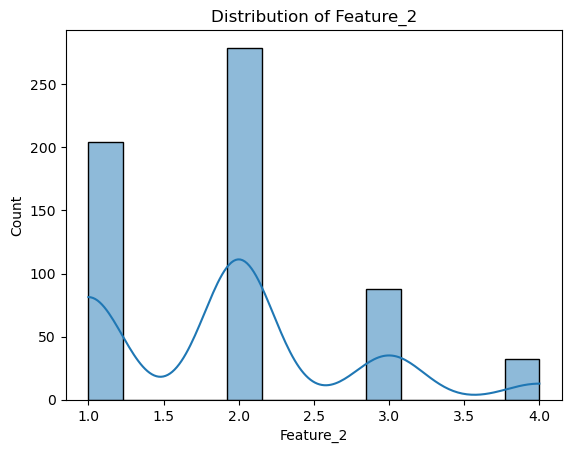

In [895]:
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')
plt.show()

The whole number values between 1 and 4 could suggest it may be number of study hours in a day

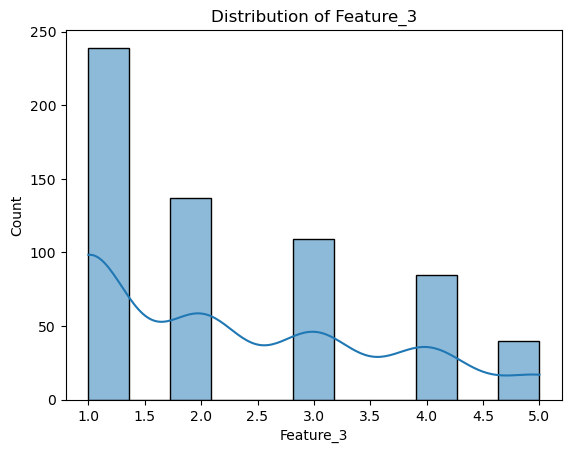

In [896]:
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')
plt.show()

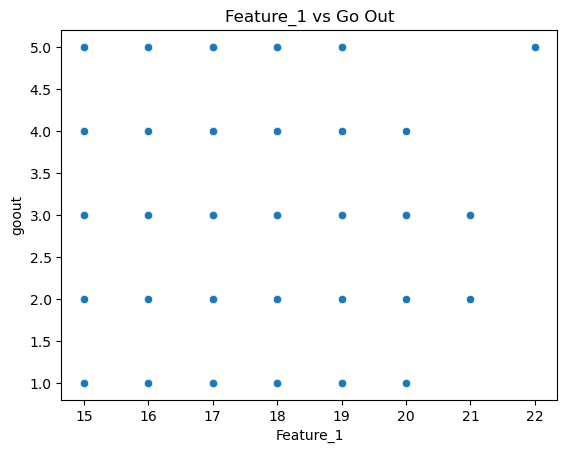

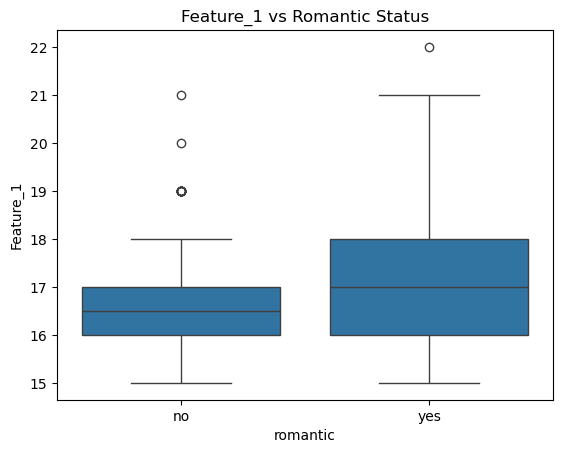

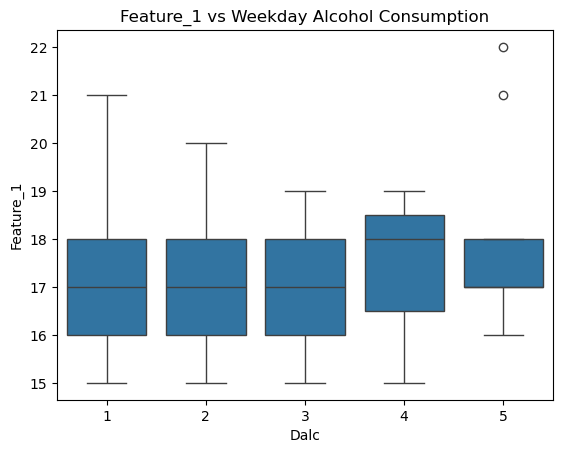

Feature_1     1.000000
failures      0.312151
Dalc          0.168583
absences      0.119640
Feature_3     0.097160
goout         0.089430
traveltime    0.045970
Feature_2     0.014528
health       -0.007759
freetime     -0.026015
famrel       -0.040149
G3           -0.105610
Medu         -0.111327
G2           -0.118624
Fedu         -0.138840
G1           -0.181571
Name: Feature_1, dtype: float64


In [897]:
sns.scatterplot(x='Feature_1', y='goout', data=df)
plt.title('Feature_1 vs Go Out')
plt.show()

sns.boxplot(x='romantic', y='Feature_1', data=df)
plt.title("Feature_1 vs Romantic Status")
plt.show()

sns.boxplot(x='Dalc', y='Feature_1', data=df)
plt.title("Feature_1 vs Weekday Alcohol Consumption")
plt.show()

correlations = df.corr(numeric_only=True)['Feature_1'].sort_values(ascending=False)
print(correlations)


Feature_1 is showing weak correlation with other factors showing it could be an independent factor. Therefore it has high of chance of being age.

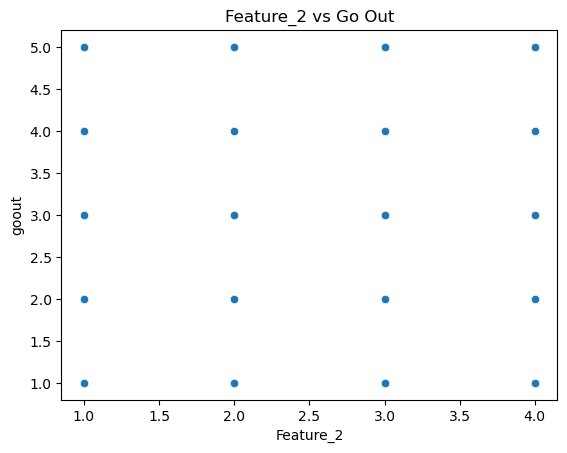

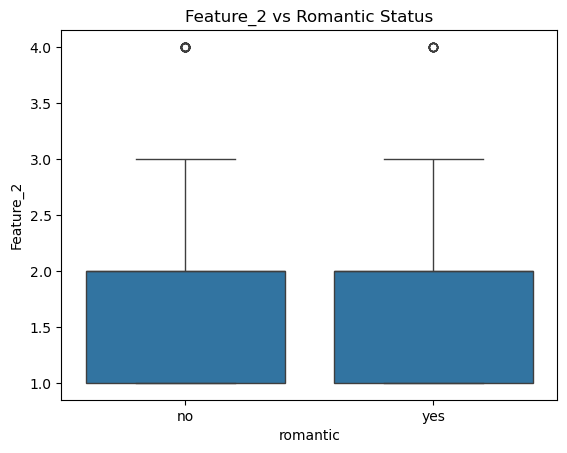

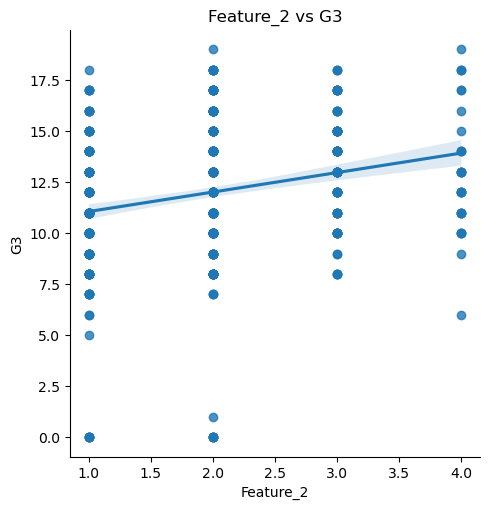

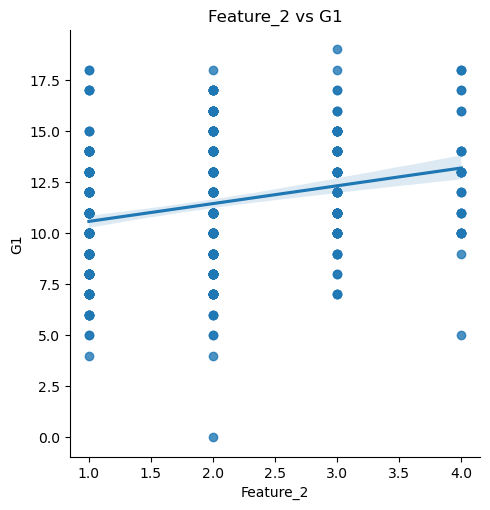

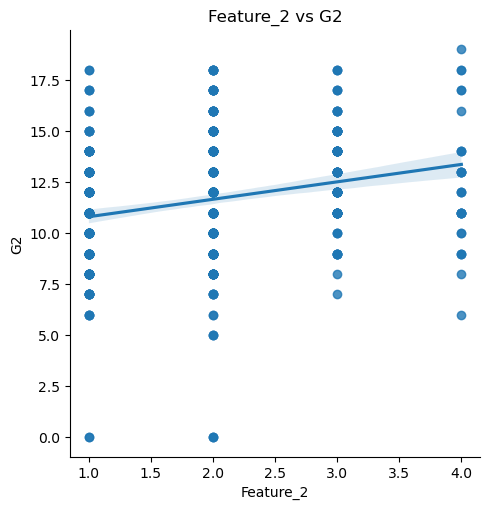

Feature_2     1.000000
G1            0.261477
G3            0.249884
G2            0.245547
Medu          0.097210
Fedu          0.051633
Feature_1     0.014528
famrel       -0.018598
freetime     -0.045388
traveltime   -0.048797
health       -0.062246
goout        -0.068552
absences     -0.133554
failures     -0.144468
Dalc         -0.147515
Feature_3    -0.199162
Name: Feature_2, dtype: float64


In [898]:
sns.scatterplot(x='Feature_2', y='goout', data=df)
plt.title('Feature_2 vs Go Out')
plt.show()

sns.boxplot(x='romantic', y='Feature_2', data=df)
plt.title("Feature_2 vs Romantic Status")
plt.show()

sns.lmplot(x='Feature_2', y='G3', data=df)
plt.title('Feature_2 vs G3')
plt.show()

sns.lmplot(x='Feature_2', y='G1', data=df)
plt.title('Feature_2 vs G1')
plt.show()

sns.lmplot(x='Feature_2', y='G2', data=df)
plt.title('Feature_2 vs G2')
plt.show()

correlations = df.corr(numeric_only=True)['Feature_2'].sort_values(ascending=False)
print(correlations)

The strongest positive correlation of Feture 2 is with the grades- G1,G2 and G3.Therefore there is high chance of it being daily study hours.

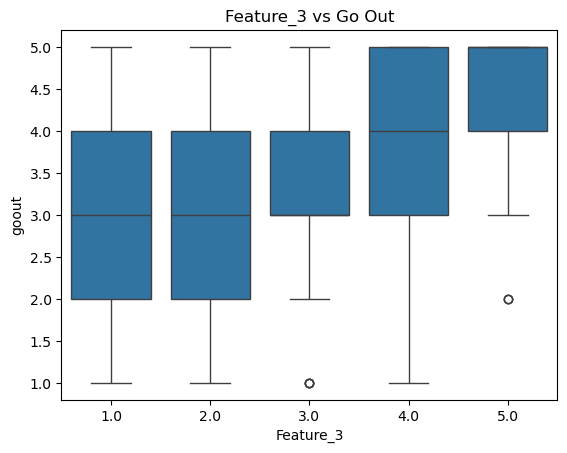

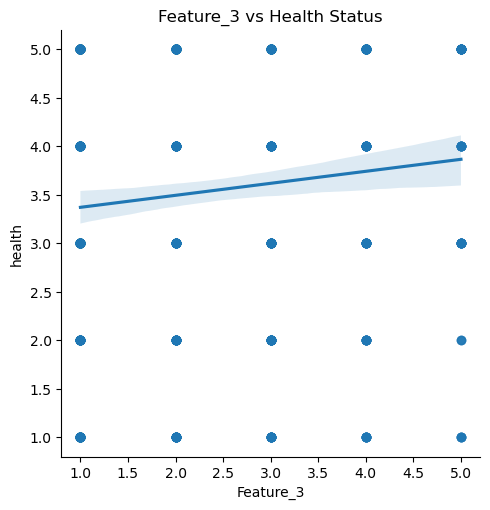

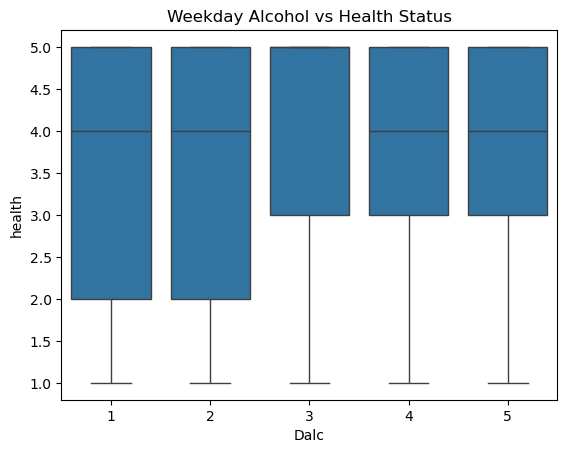

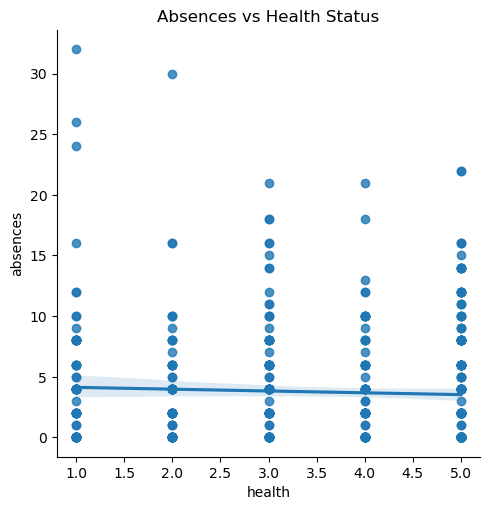

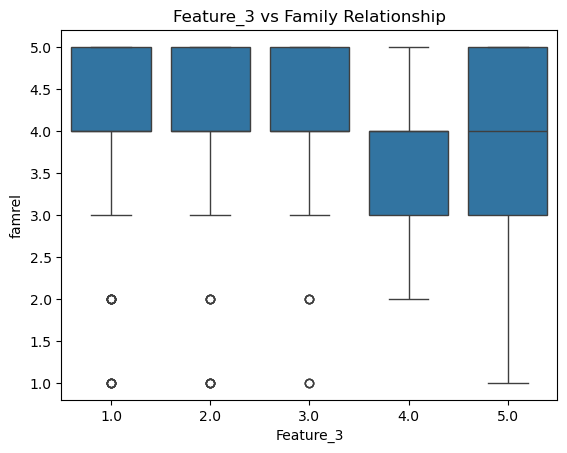

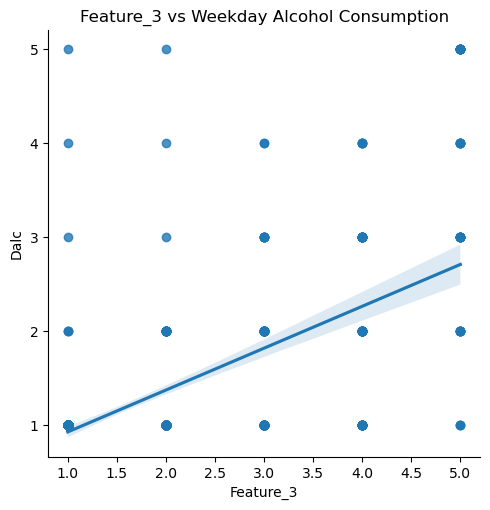

Feature_3     1.000000
Dalc          0.624373
goout         0.397811
freetime      0.149797
absences      0.138778
health        0.110179
Feature_1     0.097160
failures      0.063646
traveltime    0.052514
Fedu          0.040817
Medu         -0.009095
famrel       -0.082948
G1           -0.152487
G2           -0.168348
G3           -0.175726
Feature_2    -0.199162
Name: Feature_3, dtype: float64


In [899]:
sns.boxplot(x='Feature_3', y='goout', data=df)
plt.title('Feature_3 vs Go Out')
plt.show()



sns.lmplot(x='Feature_3', y='health', data=df)
plt.title("Feature_3 vs Health Status")
plt.show()

sns.boxplot(x='Dalc', y='health', data=df)
plt.title("Weekday Alcohol vs Health Status")
plt.show()

sns.lmplot(x='health', y='absences', data=df)
plt.title("Absences vs Health Status")
plt.show()


sns.boxplot(x='Feature_3', y='famrel', data=df)
plt.title("Feature_3 vs Family Relationship")
plt.show()

sns.lmplot(x='Feature_3', y='Dalc', data=df)
plt.title('Feature_3 vs Weekday Alcohol Consumption')
plt.show()


correlations = df.corr(numeric_only=True)['Feature_3'].sort_values(ascending=False)
print(correlations)

A conlcusion could not be obtained on Feature 3. It has strong correlation with the weekday alcohol consumption and negative correlation with the grades. Could be related to part time.

Feature 1 : Age
Feature 2 : Daily study hours
Feature 3 : No proper conclusion(Could be party time)

Data Imputation

In [900]:
print(df.isnull().sum())


school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64


In [ ]:
import numpy as np

def proportional_impute(df, col):
    #  calculate proportions
    value_counts = df[col].value_counts(normalize=True)
    
   
    missing_indices = df[df[col].isnull()].index
    
    imputed_values = np.random.choice(value_counts.index, size=len(missing_indices), p=value_counts.values)
    
    # Fill the missing values
    df.loc[missing_indices, col] = imputed_values

# Apply proportional imputation
for col in ['famsize', 'higher']:
    proportional_impute(df, col)
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")
df[['Fedu', 'traveltime', 'freetime', 'Feature_2', 'Feature_3','absences','Feature_1','G2']] = median_imputer.fit_transform(
    df[['Fedu', 'traveltime', 'freetime', 'Feature_2', 'Feature_3','absences','Feature_1','G2']]
)
print(df.isnull().sum().sort_values(ascending=False))

school        0
nursery       0
Feature_3     0
Feature_2     0
Feature_1     0
G3            0
G2            0
G1            0
absences      0
health        0
Dalc          0
goout         0
freetime      0
famrel        0
internet      0
higher        0
activities    0
sex           0
paid          0
famsup        0
schoolsup     0
failures      0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
romantic      0
dtype: int64


EDA 

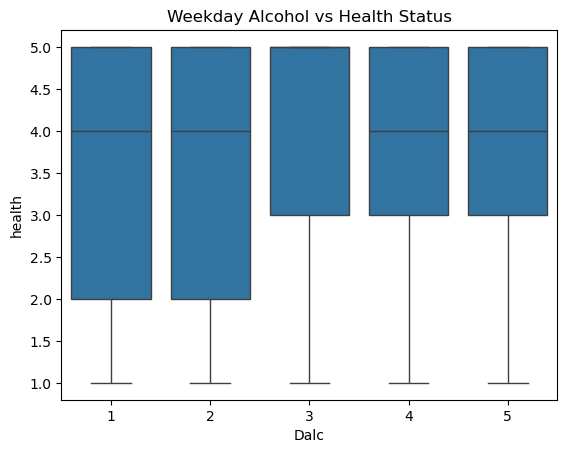

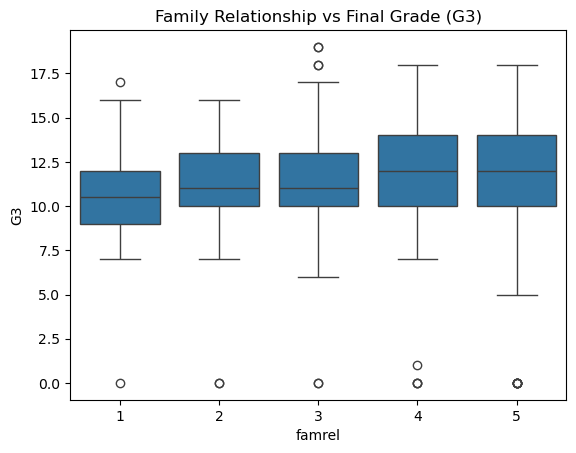

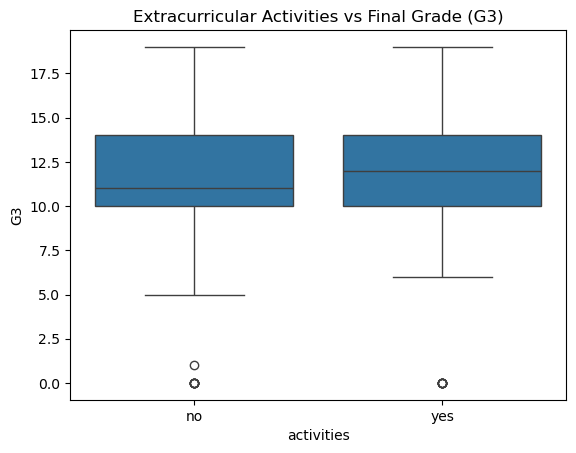

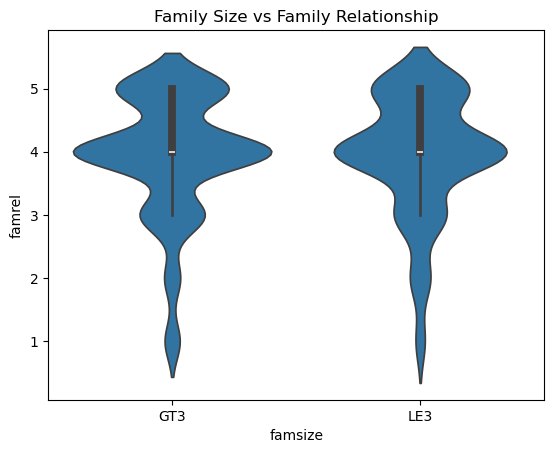

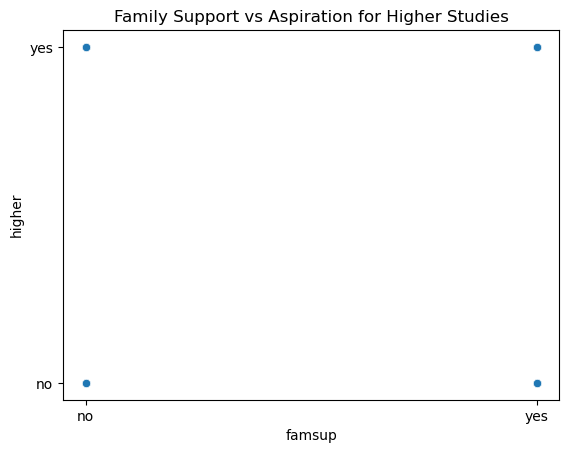

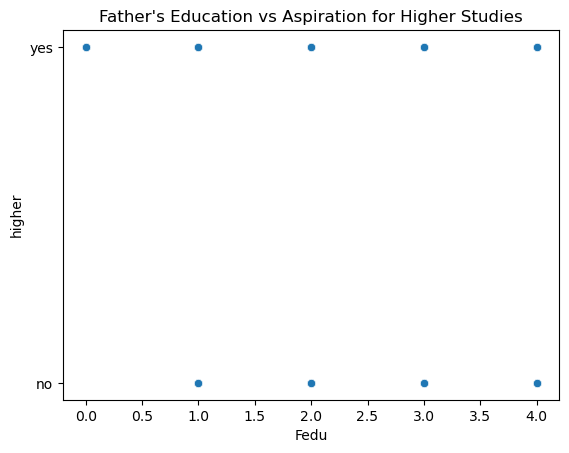

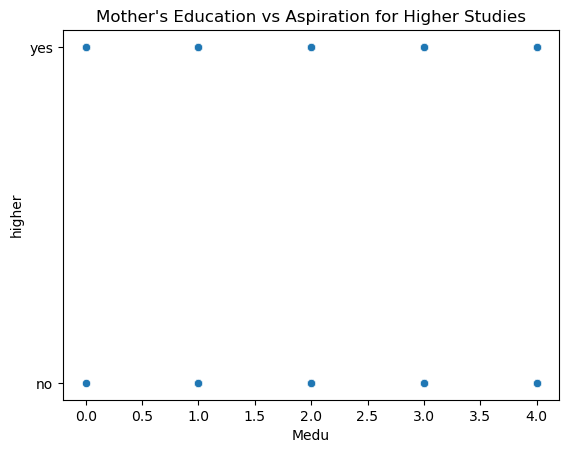

In [920]:
#Question 1: Relation between weekday alcohol consumption and health status
sns.boxplot(x='Dalc', y='health', data=df)
plt.title("Weekday Alcohol vs Health Status")
plt.show()

#Question 2: How does the family relationship affect the grades?
sns.boxplot(x='famrel', y='G3', data=df)
plt.title("Family Relationship vs Final Grade (G3)")        
plt.show()


#Question 3: Does extracurricular activities affect the final grade?
sns.boxplot(x='activities', y='G3', data=df)
plt.title("Extracurricular Activities vs Final Grade (G3)")
plt.show()

#Question 4: Does family size affect the relationship with family members?
sns.violinplot(x='famsize', y='famrel', data=df)
plt.title("Family Size vs Family Relationship")
plt.show()

#Does family support and education level of parents affect the aspiration for higher studies?
sns.scatterplot(x='famsup', y='higher', data=df)
plt.title("Family Support vs Aspiration for Higher Studies")
plt.show()
sns.scatterplot(x='Fedu', y='higher', data=df)
plt.title("Father's Education vs Aspiration for Higher Studies")
plt.show()
sns.scatterplot(x='Medu', y='higher', data=df)
plt.title("Mother's Education vs Aspiration for Higher Studies")
plt.show()



In [921]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_model = df.copy()

# Encode categorical columns
label_cols = df_model.select_dtypes(include='object').columns
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  

# Split into features and target
X = df_model.drop(columns=['romantic'])
y = df_model['romantic']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.584615   0.452830  0.489796  0.470588
Decision Tree        0.546154   0.395833  0.387755  0.391753
SVM                  0.584615   0.432432  0.326531  0.372093
Random Forest        0.600000   0.411765  0.142857  0.212121
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        81
           1       0.41      0.14      0.21        49

    accuracy                           0.60       130
   macro avg       0.52      0.51      0.47       130
weighted avg       0.55      0.60      0.54       130



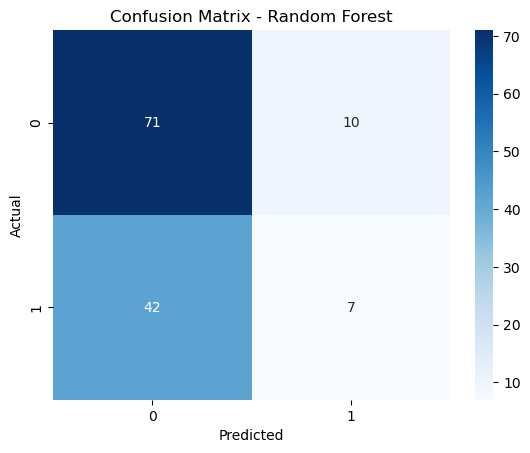

G1: 0.0633
G3: 0.0625
G2: 0.0578
absences: 0.0551
Feature_1: 0.0546
Feature_3: 0.0422
freetime: 0.0418
goout: 0.0407
famrel: 0.0405
Feature_2: 0.0382


In [922]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
results_df = pd.DataFrame(results).T.sort_values(by="F1 Score", ascending=False)
print(results_df)
# Plotting the results
print(classification_report(y_test, models["Random Forest"].predict(X_test)))
def plot_confusion(model, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(models["Random Forest"], "Random Forest")



importances = models["Random Forest"].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

for i in indices[:10]:  # top 10
    print(f"{features[i]}: {importances[i]:.4f}")



Before SMOTE: romantic
0    329
1    190
Name: count, dtype: int64
After SMOTE: romantic
0    329
1    329
Name: count, dtype: int64
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.546154   0.403846  0.428571  0.415842
SVM                  0.569231   0.410256  0.326531  0.363636
Decision Tree        0.492308   0.339623  0.367347  0.352941
Random Forest        0.592308   0.437500  0.285714  0.345679
Top 10 important features:
Feature_1    0.073710
absences     0.060151
G2           0.058270
G1           0.055225
freetime     0.049890
Feature_2    0.049361
G3           0.049216
Feature_3    0.047252
Fedu         0.043737
Mjob         0.039051
dtype: float64


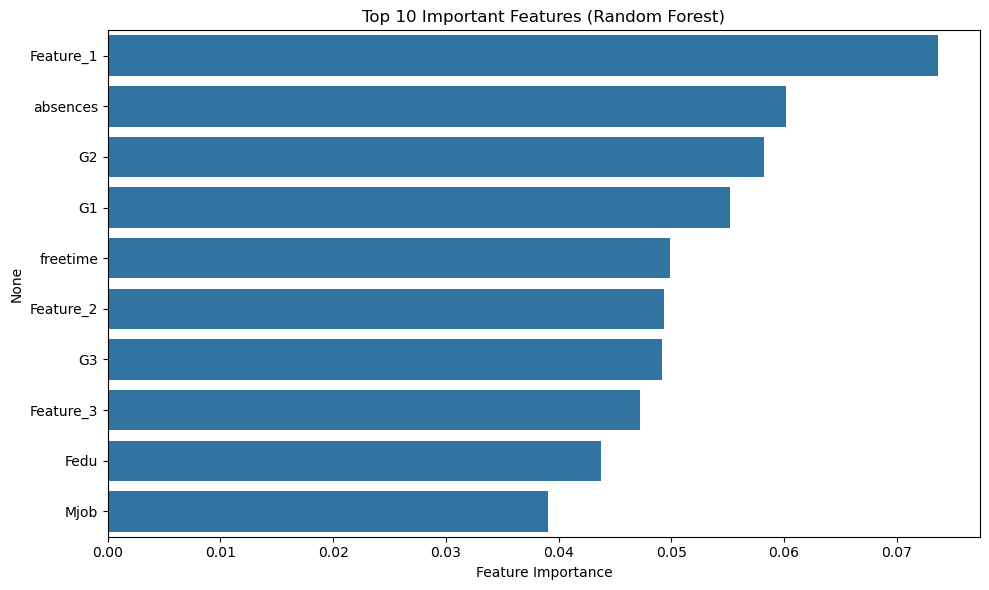

In [923]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

results_smote = {}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)  
    
    results_smote[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results_df_smote = pd.DataFrame(results_smote).T.sort_values(by="F1 Score", ascending=False)
print(results_df_smote)
importances = models["Random Forest"].feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display top features
print("Top 10 important features:")
print(feature_importance.head(10))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


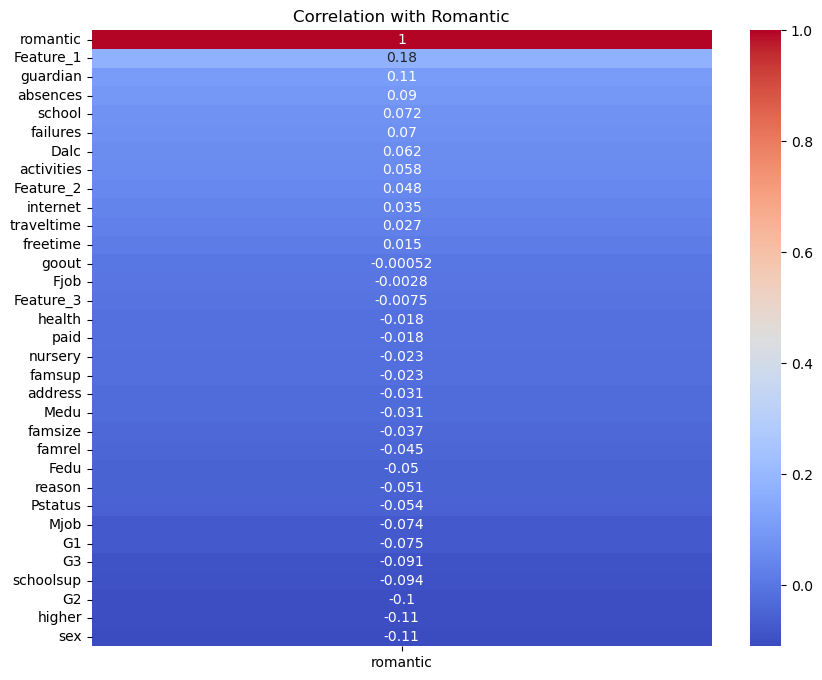

In [924]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_model.corr()[['romantic']].sort_values(by='romantic', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Romantic")
plt.show()





Confusion Matrix:
[[63 18]
 [35 14]]


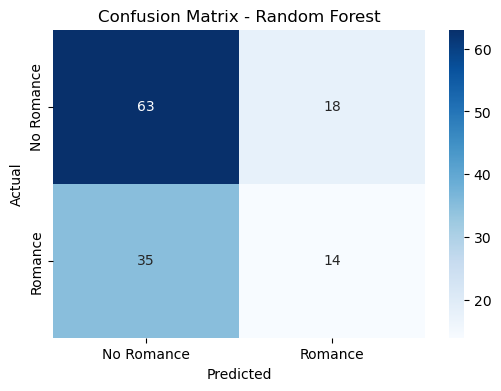

Overall Accuracy: 0.5923
Precision: 0.438
Recall: 0.286
F1 Score: 0.346


In [925]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set using Random Forest
y_pred = models["Random Forest"].predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Romance', 'Romance'], yticklabels=['No Romance', 'Romance'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Overall Accuracy
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Overall Accuracy: {acc:.4f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")


Best k: 1
Confusion Matrix:
 [[51 31]
 [20 28]]
Accuracy: 0.608
Precision: 0.475
Recall: 0.583
F1 Score: 0.523


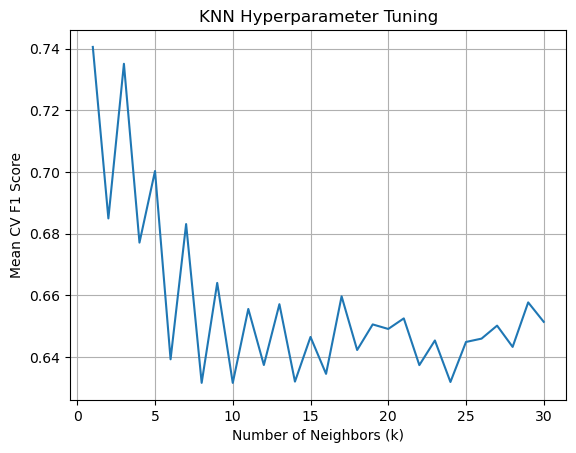

In [926]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# 1. Separate features and target
X = df_model.drop(columns=['romantic'])
y = df_model['romantic']

# 2. Apply SMOTE before splitting 
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_raw, y_train)

# 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test_raw)

# 4. Hyperparameter tuning for k
param_grid = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train_res)

print("Best k:", grid.best_params_['n_neighbors'])

# 5. Evaluate on test set
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

import matplotlib.pyplot as plt

plt.plot(param_grid['n_neighbors'], grid.cv_results_['mean_test_score'])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV F1 Score')
plt.title('KNN Hyperparameter Tuning')
plt.grid(True)
plt.show()




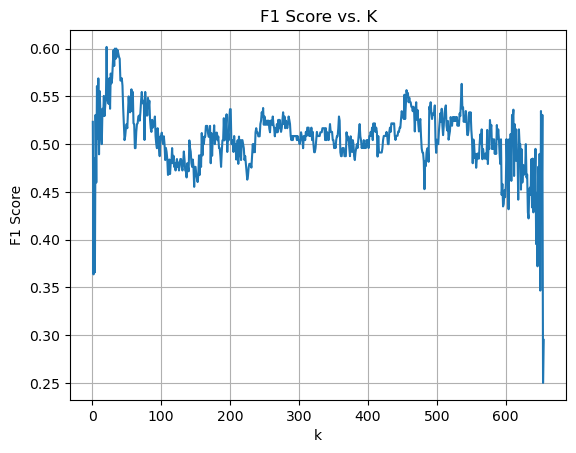

In [927]:
import matplotlib.pyplot as plt
scores = []
for k in range(1, 656):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_res)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
plt.plot(range(1, 656), scores)
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. K")
plt.grid(True)
plt.show()


In [928]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1. Train the model with k = 47
knn_k47 = KNeighborsClassifier(n_neighbors=47)
knn_k47.fit(X_train, y_train_res)

# 2. Predict on the test set
y_pred_k47 = knn_k47.predict(X_test)

# 3. Evaluate performance
cm_k47 = confusion_matrix(y_test, y_pred_k47)
acc_k47 = accuracy_score(y_test, y_pred_k47)
prec_k47 = precision_score(y_test, y_pred_k47)
rec_k47= recall_score(y_test, y_pred_k47)
f1_k47 = f1_score(y_test, y_pred_k47)

# 4. Print results
print("Confusion Matrix (k=6):\n", cm_k47)
print(f"Accuracy: {acc_k47:.3f}")
print(f"Precision: {prec_k47:.3f}")
print(f"Recall: {rec_k47:.3f}")
print(f"F1 Score: {f1_k47:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_k47))


Confusion Matrix (k=6):
 [[41 41]
 [18 30]]
Accuracy: 0.546
Precision: 0.423
Recall: 0.625
F1 Score: 0.504

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.50      0.58        82
           1       0.42      0.62      0.50        48

    accuracy                           0.55       130
   macro avg       0.56      0.56      0.54       130
weighted avg       0.59      0.55      0.55       130



Final Model Results